# Netflix Data
### Utilizaremos Sql y Sweetviz para abordar el analisis, además de varias librerias

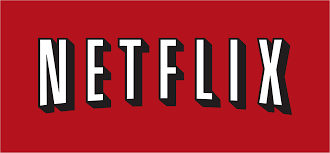

In [55]:
#Importamos librerias a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
#Importamos el DataSet
df_netflix = pd.read_csv("netflix1.csv")
df_netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


#### Se utiliza *Sweetviz* para una realizar aproximación a los datos y ver como estan conformados

                                             |          | [  0%]   00:00 -> (? left)


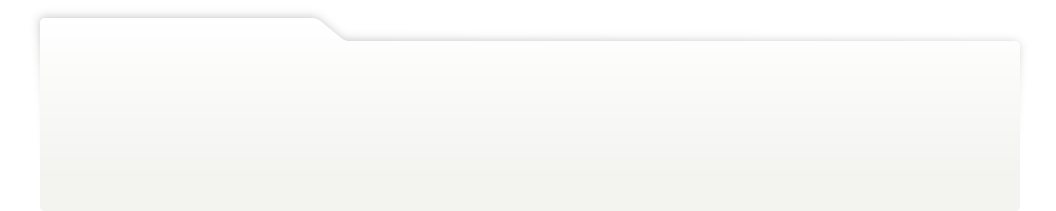
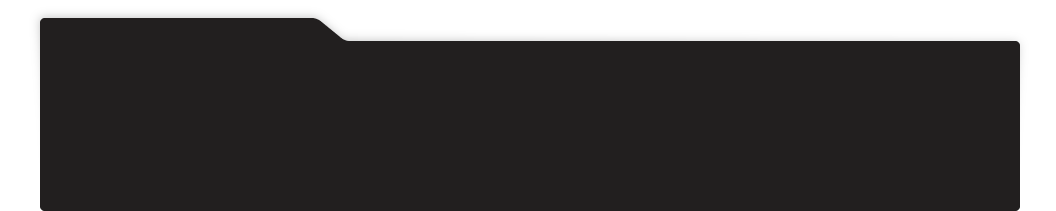
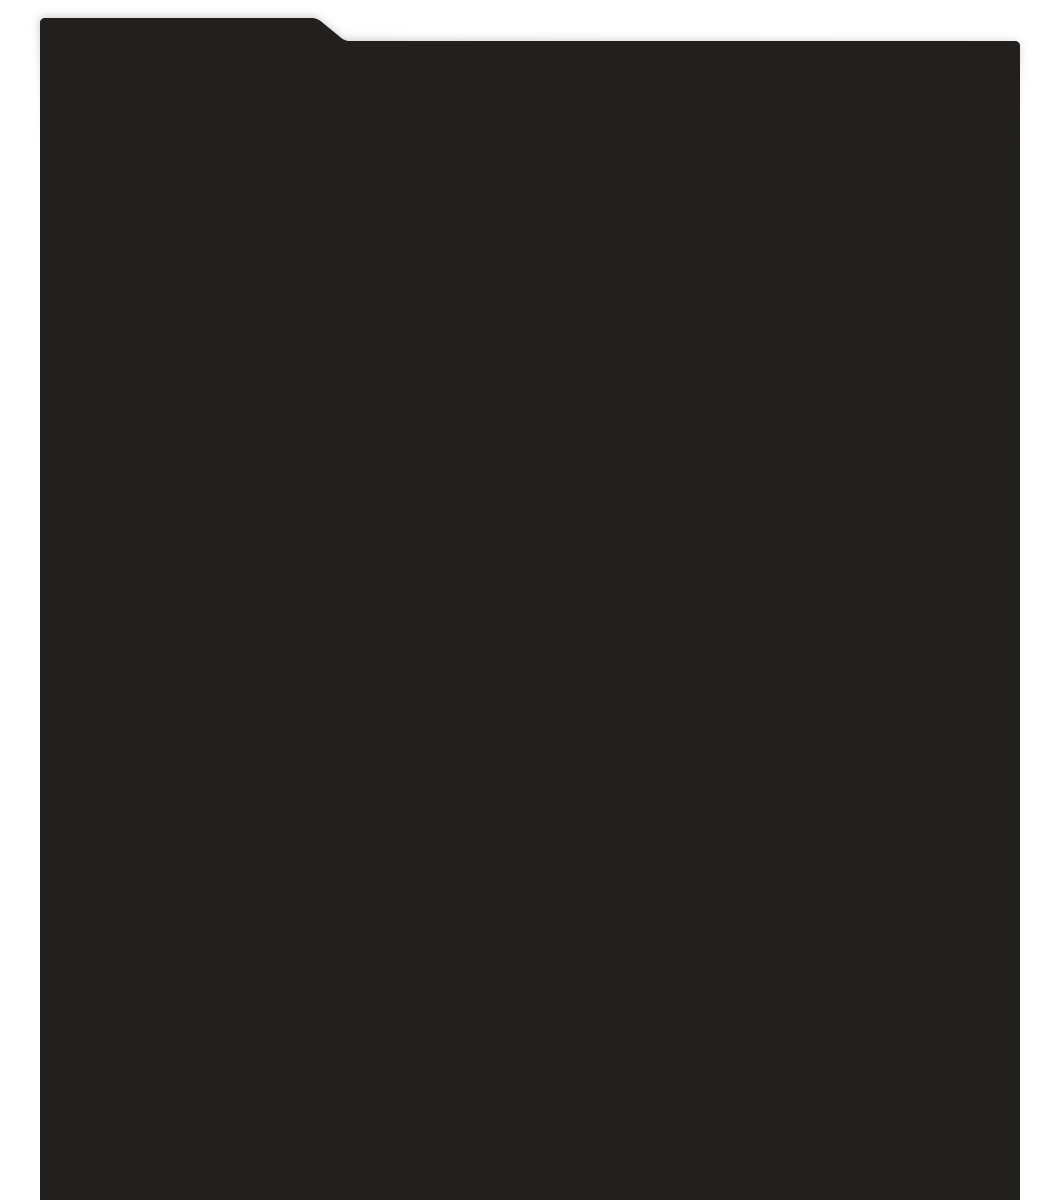
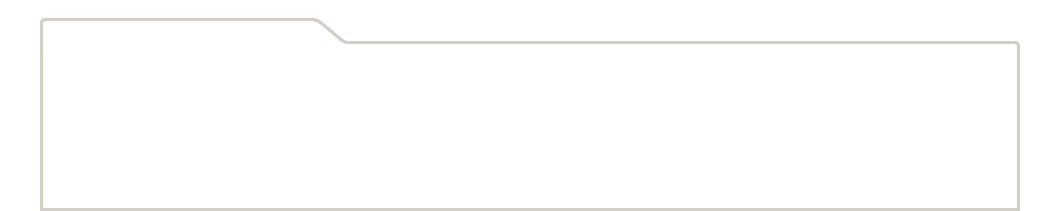
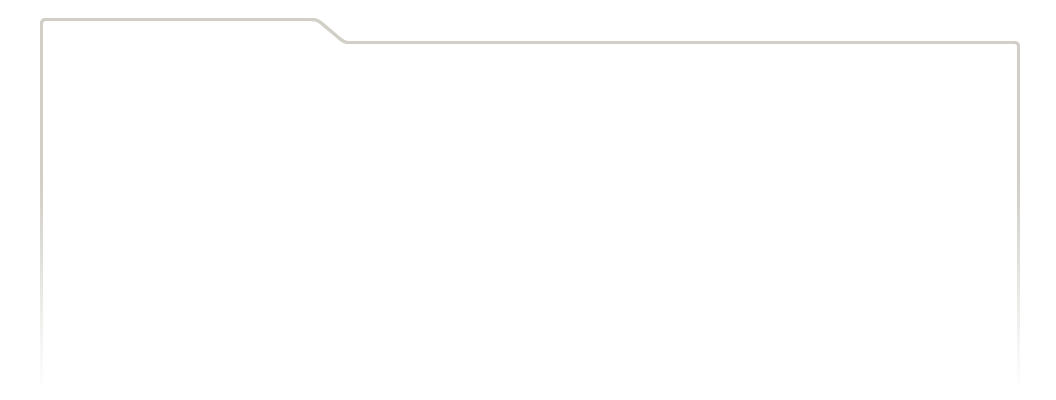
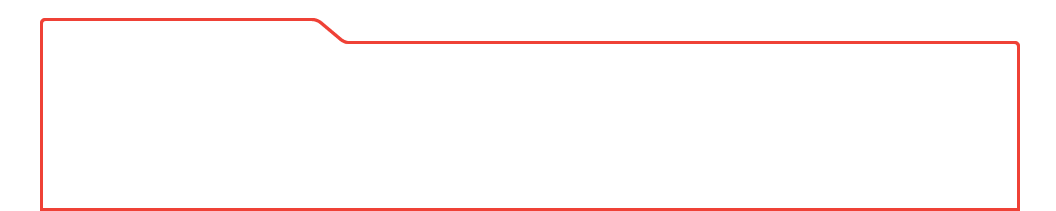
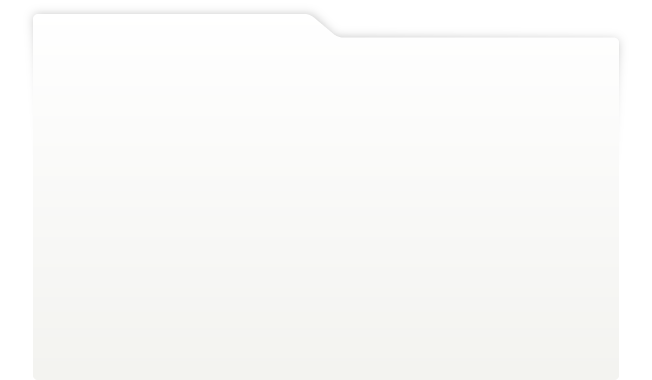
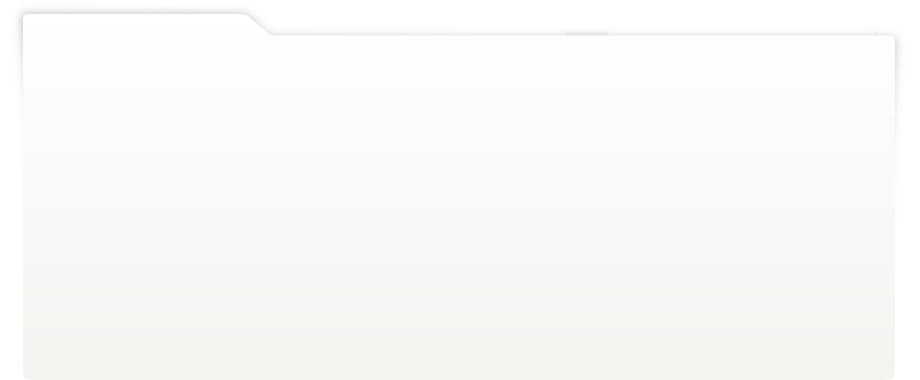
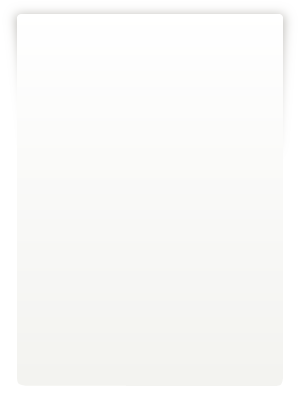
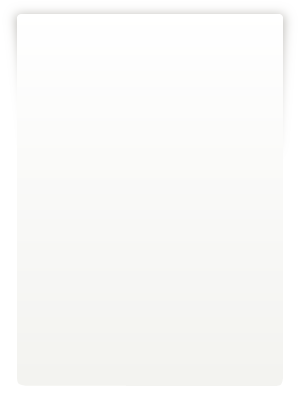
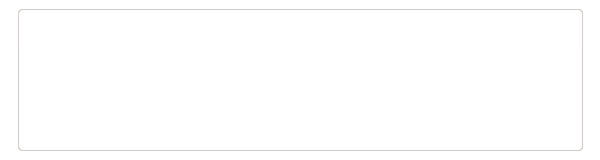
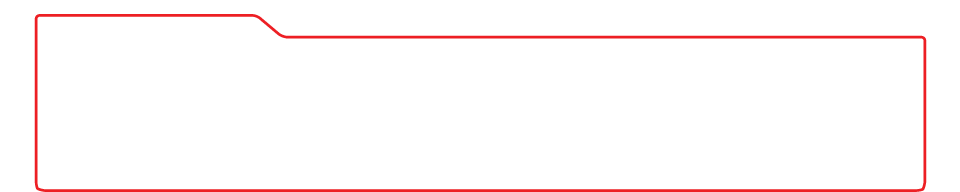
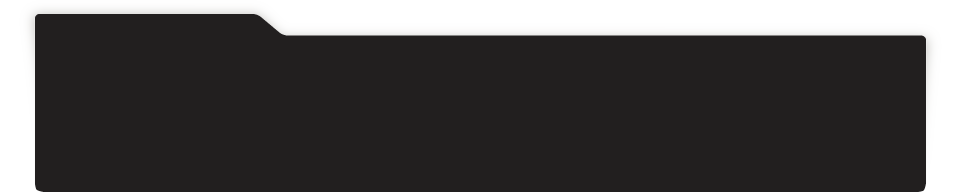
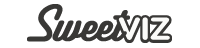
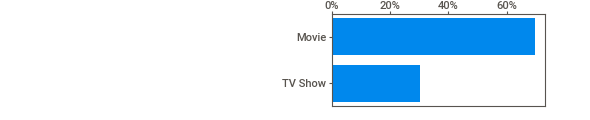
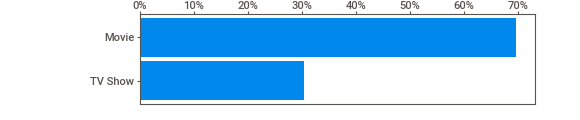
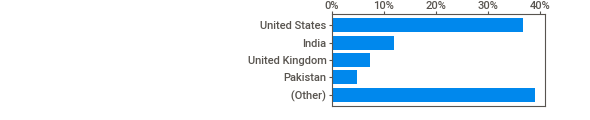
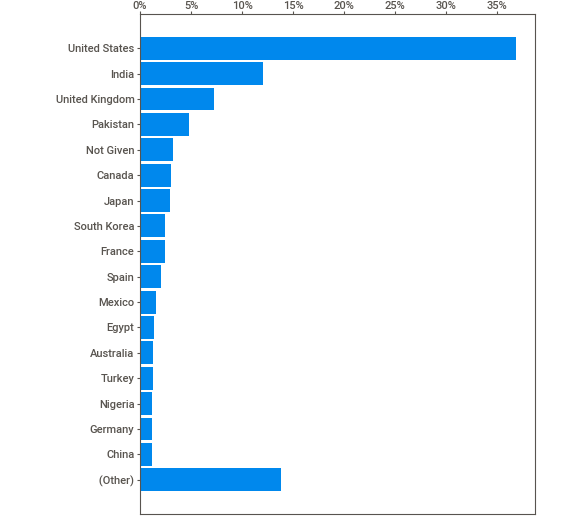
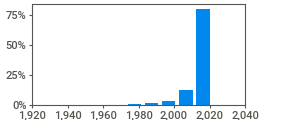
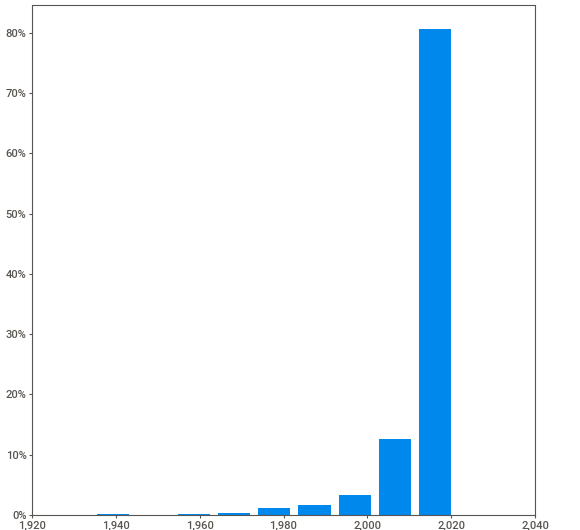
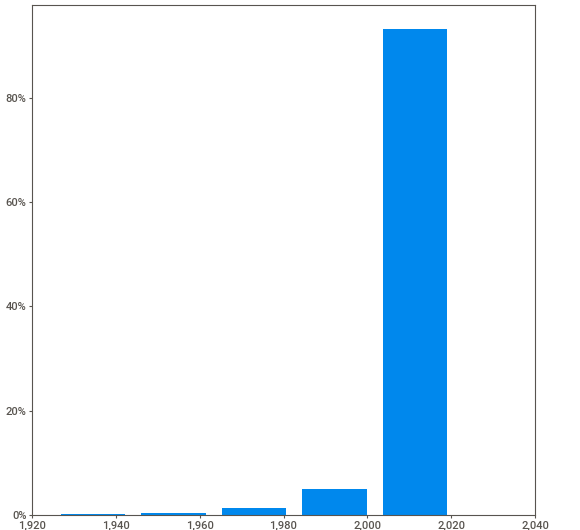
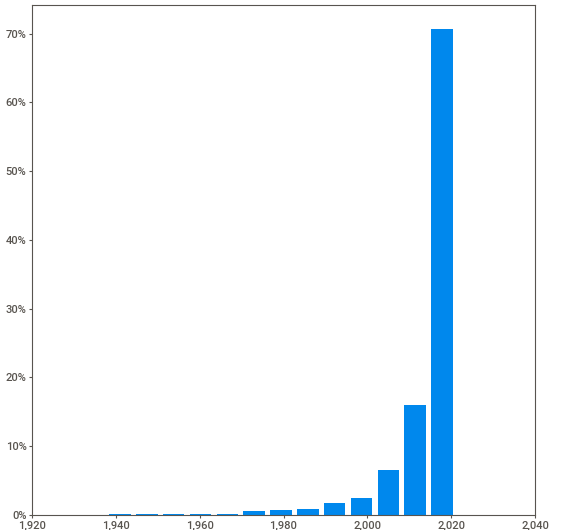
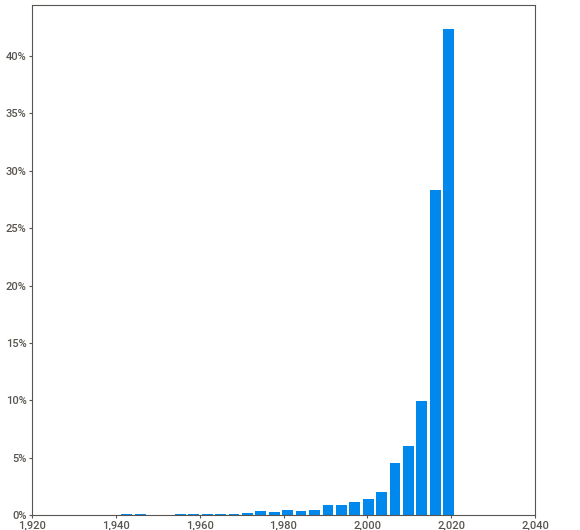
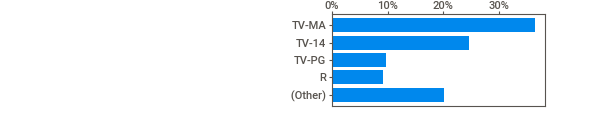
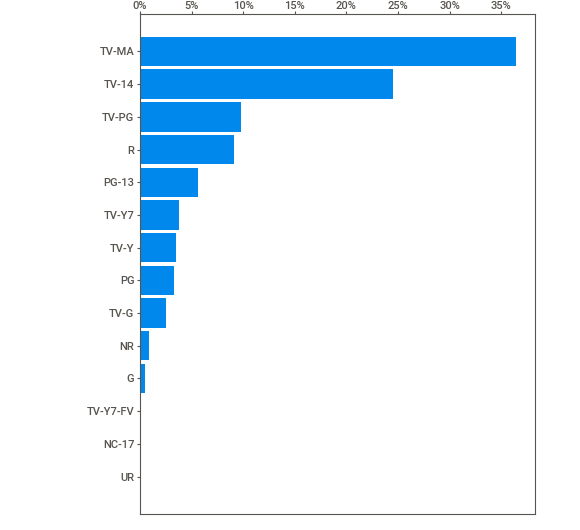
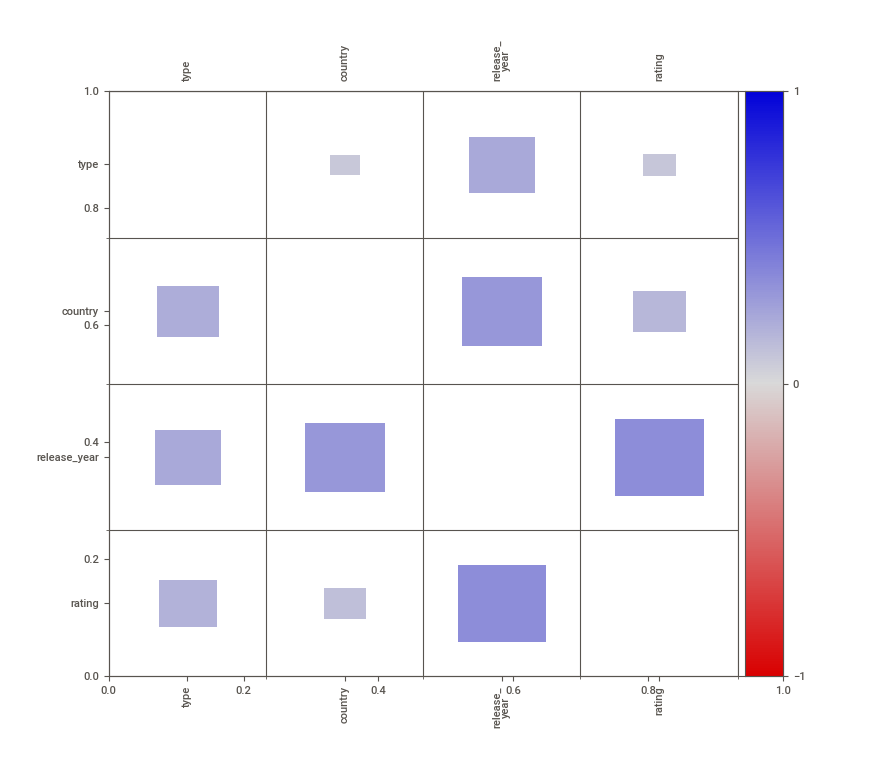
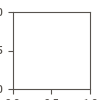

In [57]:
import sweetviz as sv
#analiza el datset
report= sv.analyze(df_netflix)

#Accedemos al reporte
report.show_notebook()

### Se hará uso de *SQL* para trabajar con los datos

In [58]:
#Importamos lo necesario para trabajar con SQL
from sqlalchemy import engine
from pandasql import sqldf

#Funcion Lamda para correr Querys de SQL de manera mucho mas facil
pysqldf = lambda q: sqldf(q, globals())

#### Contamos la columna 'show_id' para chequear duplicados, ya que en esta columna se muestran los ID únicos

In [59]:
#Chequeamos con uso de SQL si hay valores duplicados
q = """

SELECT show_id, COUNT(*)                                                                                                                                                                            
FROM df_netflix 
GROUP BY show_id                                                                                                                                                                                            
ORDER BY show_id DESC

"""
pysqldf(q)
#NO HAY VALORES DUPLICADOS

,show_id,COUNT(*)
0,s999,1
1,s998,1
2,s997,1
3,s996,1
4,s995,1
...,...,...
8785,s1001,1
8786,s1000,1
8787,s100,1
8788,s10,1


In [62]:
q= """
SELECT *
FROM df_netflix

"""
pysqldf(q)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [63]:
#Contamos duplicados con Python
print(df_netflix['show_id'].duplicated().sum())

0


In [36]:
q = """ 
SELECT 
    COUNT(*) FILTER (WHERE show_id IS NULL) AS showid_nulls,
    COUNT(*) FILTER (WHERE type IS NULL) AS type_nulls,
    COUNT(*) FILTER (WHERE title IS NULL) AS title_nulls,
    COUNT(*) FILTER (WHERE director IS NULL) AS director_nulls,
    COUNT(*) FILTER (WHERE country IS NULL) AS country_nulls,
    COUNT(*) FILTER (WHERE date_added IS NULL) AS date_added_nulls,
    COUNT(*) FILTER (WHERE release_year IS NULL) AS release_year_nulls,
    COUNT(*) FILTER (WHERE rating IS NULL) AS rating_nulls,
    COUNT(*) FILTER (WHERE duration IS NULL) AS duration_nulls,
    COUNT(*) FILTER (WHERE listed_in IS NULL) AS listed_in_nulls
FROM df_netflix
"""
pysqldf(q)


,showid_nulls,type_nulls,title_nulls,director_nulls,country_nulls,date_added_nulls,release_year_nulls,rating_nulls,duration_nulls,listed_in_nulls
0,0,0,0,0,0,0,0,0,0,0


In [37]:
#Contamos los nulos con Python
print(df_netflix['show_id'].isna().sum())

0


In [38]:
print(df_netflix['listed_in'])

0                                           Documentaries
1       Crime TV Shows, International TV Shows, TV Act...
2                      TV Dramas, TV Horror, TV Mysteries
3                      Children & Family Movies, Comedies
4        Dramas, Independent Movies, International Movies
                              ...                        
8785                    International TV Shows, TV Dramas
8786                                             Kids' TV
8787    International TV Shows, Romantic TV Shows, TV ...
8788                                             Kids' TV
8789                                             Kids' TV
Name: listed_in, Length: 8790, dtype: object


#### Podemos ver que el DataSet esta bien poblado y sin datos Nulos ni Duplicados

#### Procedemos a graficar

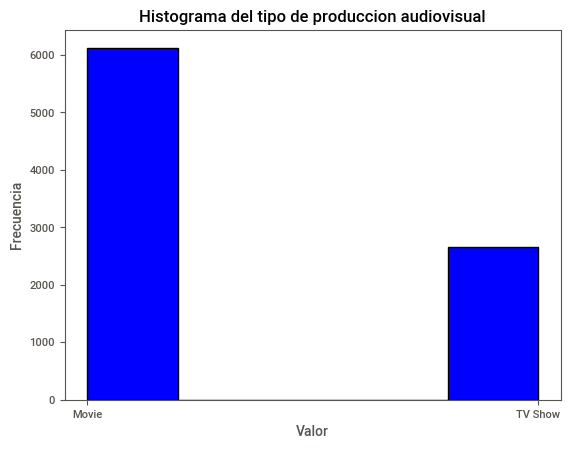

In [39]:
#Ahora graficamos 
plt.hist(df_netflix['type'],bins= 5,color='blue',edgecolor='black')

#Se añade eñ titulo y la etiqueta
plt.title('Histograma del tipo de produccion audiovisual')
plt.xlabel('Tipo de Producción')
plt.ylabel('Frecuencia')

#Mostramos el grafico
plt.show()

#### La gran mayoria de producciones son de Peliculas, rondando las 6000, y el resto esta ocupado por show de tv o series.
* Demostrando la preferencia de los usuarios por las peliculas por encima de las series y shows de tv 

#### Modificamos la variable *'release_year'* de String a Integer para poder graficar

In [40]:

df_netflix['release_year'].astype('int64')

0       2020
1       2021
2       2021
3       2021
4       1993
        ... 
8785    2016
8786    2016
8787    2012
8788    2016
8789    2016
Name: release_year, Length: 8790, dtype: int64

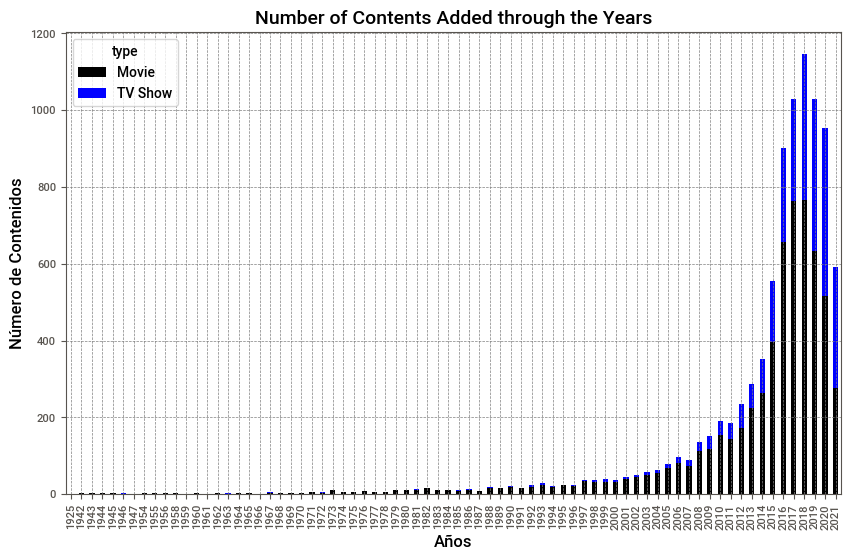

In [52]:
# Contar cuántos contenidos hay por año y tipo
df_counts = df_netflix.groupby(['release_year', 'type']).size().unstack()

# Filtrar los datos para mostrar solo a partir del año 2000
df_filtered = df_netflix[df_netflix['release_year'] >= 2008]

# Crear un gráfico de barras
df_counts.plot(kind='bar', stacked=True, color=['black', 'blue'], figsize=(10,6))

# Personalizar el gráfico
plt.title('Number of Contents Added through the Years', color='black', fontsize=14)
plt.xlabel('Años', color='black', fontsize=12)
plt.ylabel('Número de Contenidos', color='black', fontsize=12)

# Añadir cuadrícula
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.show()

#### Vemos como los contenidos y su frecuencia fueron multiplicandose a través de los años primero debido a la globalizacion y en consecuencia el aumento en el alcance de las producciones y mucho más luego del boom de las plataformas de streaming.
#### *Dato importante:*  Netflix fue lanzado en el año 2007 viendo como en el grafico el crecimiento de los contenidos lanzados fue creciendo exponencialmente 

#### Contamos las frecuencias de la columna *'rating'* para ver el tipo de clasificación de la producción y contar la cantidad de cada entidad para un mejor analisis

In [43]:
frequencies= df_netflix['rating'].value_counts()
print(frequencies)

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


#### Analizamos el tipo de clasificacion (para que público esta dirigida)  de las producciones para ver las preferencias

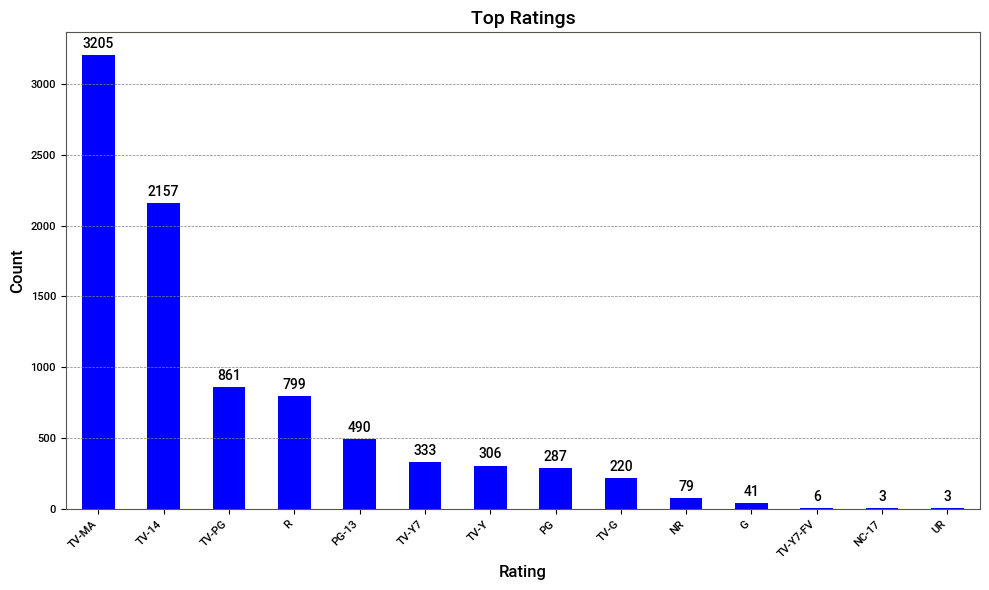

In [53]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
frequencies.plot(kind='bar', color='blue')

# Añadir etiquetas
for i, valor in enumerate(frequencies):
    plt.text(i, valor + 50, str(valor), ha='center', color='black')

# Personalizar el gráfico
plt.title('Top Ratings', color='black', fontsize=14)
plt.xlabel('Rating', color='black', fontsize=12)
plt.ylabel('Count', color='black', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.tick_params(colors='black')  # Colores de los ticks en blanco


# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### TV-MA Se refiere a una producción dirigida para mayores de 17 años. Podemos ver que hay un gran enfoque en este público. Teniedo en cuenta esto y el hecho de la preferencia de los usuarios por las peliculas. Podemos ver un punto para aprovechar en cuanto al contenido que se puede ofrecer, explotando este público y su preferencia por sobre las peliculas.